# 参考代码 无用

In [4]:
#encoding:utf8
import gensim,jieba,os
stoplist = {}.fromkeys([ line.strip() for line in open("所有停用词") ])  
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                if len(line) > 0:
                    yield [segment for segment in jieba.cut(line.strip(),cut_all=False) if segment not in stoplist]

dirname = 'zh-simplify'

sentences = MySentences(dirname)
model = gensim.models.Word2Vec(sentences=sentences, size=300,min_count=5,workers=7)
model.wv.save_word2vec_format('myWord2Vec',binary=False)
import gensim
# 导入模型 
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True) 

# 返回一个词 的向量：
print(model['word'])

# 返回和一个词语最相关的多个词语以及对应的相关度
items = model.most_similar('happy')
for item in items:
    # 词的内容，词的相关度
    print(item[0], item[1])

IOError: [Errno 2] No such file or directory: '\xe6\x89\x80\xe6\x9c\x89\xe5\x81\x9c\xe7\x94\xa8\xe8\xaf\x8d'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gensim,jieba,os

#### Read me SentenceEncoding.py
- import SentenceEncoding
- SentenceEncoding.function() e.p. SentenceEncoding.sentence_encode(data, word2vector_model, output_dimention

In [2]:
import SentenceEncoding

/Users/milan/Desktop/My_python/my_project/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = pd.read_csv('cleandemo8.csv')
# del df['Unnamed: 0']
df.head(2)

,Unnamed: 0,sessionid,request,response
0,0,13410000258T16081911402229APP,实名制了怎么还不能打电话？,请问是本机吗？我帮您开机，请稍等哈
1,1,13410000422T16082318212113APP,查询我现在的套餐,，您改了38元4G飞享套餐，9-13号生效哦，还在线吗，还有其他可以帮到您吗？


for sentences:
    sentence.cut()
    looking_up-> vec
kmeans or lda
GRU

# 词向量模型

In [4]:
from gensim.models import Word2Vec
# w = Word2Vec.load('./mymodel_pub')
# w = gensim.models.KeyedVectors.load_word2vec_format('./news_12g_baidubaike_20g_novel_90g_embedding_64.bin',binary=True)
w =  Word2Vec.load('./self_train_word2vec')

In [5]:
sens_vec = []
black = np.array([0]*w['话费'].shape[0])
for sen in df.response:
    sen = [vec for vec in jieba.cut(sen)]
    sen_array = [w[i] if i in w else black for i in sen]
    sens_vec.append(sum(sen_array)/float(len(sen_array)))
    


/Users/lucas/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ny/f3f_tg0j5pl8mzvdvjd8258c0000gn/T/jieba.cache
Loading model cost 0.767 seconds.
Prefix dict has been built succesfully.
/Users/lucas/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/Users/lucas/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [58]:
sens_vec = SentenceEncoding.sentence_encode(df.request, w, 200)

word segmentation...
Perperaing input and output...
45
Mode training...
Compiling...
Compiled, cost time:0.053714second!
Epoch 1/1
6132/6132 [==============================] - 355s 58ms/step - loss: 0.5171
Epoch 1/1
6132/6132 [==============================] - 340s 55ms/step - loss: 0.5066
Epoch 1/1
6132/6132 [==============================] - 331s 54ms/step - loss: 0.5022


# 聚类

In [59]:
sens_vec
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
sens_vec = pca.fit_transform(sens_vec)

In [60]:
sum(pca.explained_variance_ratio_)

0.999581738607958

In [61]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
# kmeans
k = 7
clf = KMeans(n_clusters=k) #设定k，这里就是调用KMeans算法 
s = clf.fit(sens_vec) #加载数据集合 

# dbscan
# clf = DBSCAN(eps=1.27, min_samples=20)
# clf.fit(sens_vec)


# AgglomerativeClustering
# clf = AgglomerativeClustering(n_clusters=7)
# clf.fit(sens_vec)


numSamples = len(sens_vec) 
centroids = clf.labels_
# print(centroids) #显示中心点
# print(clf.inertia_)  #显示聚类效果
# print(clf.cluster_centers_) #簇的中心向量
pd.DataFrame(list(clf.labels_))[0].value_counts()

0    2183
2    1617
1    1237
3     531
4     201
6     194
5     169
Name: 0, dtype: int64

In [62]:
df_cluster = pd.concat((df,pd.DataFrame(clf.labels_,columns = ['cluster'])),axis = 1)
print(df_cluster.shape)
df_cluster.head()

(6132, 5)


,Unnamed: 0,sessionid,request,response,cluster
0,0,13410000258T16081911402229APP,实名制了怎么还不能打电话？,请问是本机吗？我帮您开机，请稍等哈,1
1,1,13410000422T16082318212113APP,查询我现在的套餐,，您改了38元4G飞享套餐，9-13号生效哦，还在线吗，还有其他可以帮到您吗？,1
2,2,13410001228T160803125048,我前天办的飞享套餐，我要取消38元的,，请问是在什么时候办理的呢,2
3,4,13410001228T160803125048,电话办理的,您是不是之前要求取消了呢？,1
4,5,13410001228T160803125048,是的，我要求取消的昨天你们客服打电话来，我没接到,显示订单回退了，就是承诺使用38元套餐2个月的那个订单,2


In [63]:
df_cluster[df_cluster.cluster ==5][:4]

,Unnamed: 0,sessionid,request,response,cluster
9,12,13410001228T160803125048,有时上班也就放柜子，所以有时接不到现在就是要电话确认是不,好的，没事。那看你什么时候方便接听。我帮添加一下具体处理结果可以帮您反映让我司上级领导给您回...,5
49,87,13410008121T160807120304,也没有定义奥运专区啊怎么退订这个流量包,，目前没有看到友办理哈,5
100,231,13410022435T16082712000050APP,帮我换下套餐 把现在的套餐取消,，要换什么套餐？,5
137,306,13410028479T160809204157,你好，我想质询下本机号是否开通了香港日漫游因为到现在还未有反应,，本机刚才办理了香港日套餐了,5


In [64]:
df_cluster.groupby('cluster').count()

,Unnamed: 0,sessionid,request,response
cluster,,,,
0,2183,2183,2183,2183
1,1237,1237,1237,1237
2,1617,1617,1617,1617
3,531,531,531,531
4,201,201,201,201
5,169,169,169,169
6,194,194,194,194


# 衡量ground truth

In [65]:
df_labeled = pd.read_csv('./data_labeled_2.csv')
print(df_labeled.shape)
df_labeled.head(2)

(93, 5)


,index,sessionid,request,domain,intention
0,227,13410022560T160817102657,你好，能帮我开通国际漫游吗,漫游,漫游办理
1,516,13410061331T16082619274909APP,所以我的号每个月都要扣多少钱呢,通话,话费查询


In [66]:
df_labeled.groupby('domain').count()

,index,sessionid,request,intention
domain,,,,
业务,3,3,3,3
套餐,30,30,30,30
宽带,2,2,2,2
流量,40,40,40,40
漫游,3,3,3,3
积分,2,2,2,2
通话,13,13,13,13


In [67]:
df_cluster_labeled.groupby(['cluster','domain']).count()['index']

cluster  domain
0        业务         1
         套餐        17
         流量        25
         漫游         2
         积分         1
         通话         6
2        套餐         2
         流量         2
         通话         1
3        套餐         4
         流量         3
         通话         1
Name: index, dtype: int64

In [68]:
df_cluster_labeled = pd.merge(df_cluster,df_labeled)
df_cluster_labeled = df_cluster_labeled[df_cluster_labeled.cluster != -1]
print(df_cluster_labeled.shape)
df_cluster_labeled.head(3)

(65, 8)


,Unnamed: 0,sessionid,request,response,cluster,index,domain,intention
0,1,13410000422T16082318212113APP,查询我现在的套餐,，您改了38元4G飞享套餐，9-13号生效哦，还在线吗，还有其他可以帮到您吗？,1,1,套餐,套餐查询
1,17,13410001228T160807211011,流量不清零的介绍,流量不清零服务：所有包含流量并按月计费的主套餐（不含4G随心王）、手机流量套餐、闲时套餐，当...,1,17,流量,流量介绍
2,20,13410001228T160807211011,能否帮我查下现在用的是不是六块月租的,，您现在是6元的月租的轻松卡的套餐的,0,19,套餐,套餐查询


## 评价指标

In [69]:
df_cluster_labeled.domain.unique().shape[0]

6

In [70]:
df_cluster_labeled.groupby('domain').count()['index']

domain
业务     1
套餐    23
流量    30
漫游     2
积分     1
通话     8
Name: index, dtype: int64

In [71]:
# sklearn.metrics.homogeneity_score:每一个聚出的类仅包含一个类别的程度度量。
# sklearn.metrics.completeness:每一个类别被指向相同聚出的类的程度度量。
from sklearn import metrics
labels_true = df_cluster_labeled.domain
labels_pred = df_cluster_labeled.cluster
print(metrics.adjusted_rand_score(labels_true, labels_pred)  )
print(metrics.homogeneity_score(labels_true, labels_pred)  )


0.007489875800793707
0.1927714482191917


聚类的id进行随机分配

In [72]:

labels_true = df_cluster_labeled.domain
# labels_pred = df_cluster_labeled.cluster.sample(n=df_cluster_labeled.shape[0])
labels_pred = df_cluster_labeled.domain.sample(n=df_cluster_labeled.shape[0])
print(metrics.adjusted_rand_score(labels_true, labels_pred)  )
print(metrics.homogeneity_score(labels_true, labels_pred)  )

-0.028005537870252978
0.08438009735268259


In [73]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 1, 1, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)

0.7058823529411765

# kmeans
- 原始词向量：
0.04884546450537725
- 自己训练词向量：
0.08
- RNN encode(30 dim):
-0.015235282741429962
- RNN encode(100 dim):
-0.02398934188546309
#  分层聚类
- 0.031912071166662496


# 结果

In [74]:
df_cluster_labeled[df_cluster_labeled.cluster == 4]

,Unnamed: 0,sessionid,request,response,cluster,index,domain,intention
21,689,13410072579T16080620501635APP,还想问下每月使用的18元4G套餐超出的话费部分与58元套餐有什么不一样话费扣费，比如多少钱一分钟,，【套餐】18元4G飞享套餐【月费】18元/月，送来电显示，国内接听免费【流量】100M国内...,4,646,套餐,套餐介绍
25,783,13410084913T160807090718,我在7月抽中2元话费券，提示在8月5日至31日到广东移动手机营业厅APP我的卡包领取，怎么会没有了,，是在APP里的我的卡包里查询没有是吗？当时是参加什么活动获得的呢？,4,732,通话,话费异常


In [75]:
df_cluster[df_cluster.cluster == 3]

,Unnamed: 0,sessionid,request,response,cluster
7,8,13410001228T160803125048,已经取消了就可以了,具体处理结果还没显示哦,3
15,22,13410001783T160823205445,我已经在APP办理了,嗯嗯。。看到了，下月会退10元哦。，请问还有什么问题吗？[害羞],3
30,48,13410006681T160808172432,那29流量王的呢,30元4G流量王套餐月租30元（不含来电显示），可享受省内接听免费，套餐含512M国内通用流...,3
40,68,13410008121T160807120304,可是这此已经扣钱了哦这次,，但您这边已经生效了哦，取消不了呢,3
56,111,13410010089T16081016495144APP,都没给我流量,，麻烦您在月底留意下,3
106,239,13410022560T160817102657,韩国我想咨询一下,/checkPwd:13410022560/,3
118,261,13410024246T16081020042922APP,上面显示4G,正常是用不到的呀应该是网络问题吧[尴尬],3
123,270,13410024385T160811121422,流量王,升级了！4G流量王19/30元（升级版）推出了！那么4G流量王家族成员有9/19/30元/月...,3
127,279,13410025860T160809130508,58元套餐,那你报一下具体地址，我帮您看看是否有覆盖,3
149,347,13410029546T16080710143970APP,可不可以降到80元的套餐呢。谢谢你。,，因你办了流量年包，可以降了138元4G飞享套餐。,3


## 对labeled数据进行聚类

In [57]:
sens_vec_labeld = []
black = np.array([0]*w['词'].shape[0])
for sen in df_labeled.response:
    sen = [vec for vec in jieba.cut(sen)]
    sen_array = [w[i] if i in w else black for i in sen]
    sens_vec_labeld.append(sum(sen_array)/float(len(sen_array)))

/Users/milan/Desktop/My_python/my_project/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyError: "word '\xe8\xaf\x8d' not in vocabulary"

In [ ]:
s = clf.predict(sens_vec_labeld) #加载数据集合
numSamples = len(sens_vec_labeld) 
centroids = clf.labels_
print(centroids) #显示中心点
print(clf.inertia_)  #显示聚类效果
df_cluster_labeled = pd.concat((df_labeled,pd.DataFrame(clf.labels_,columns = ['cluster'])),axis = 1)
print(df_cluster_labeled.shape)
df_cluster_labeled.head()

In [97]:
df_cluster_labeled.groupby(['cluster','domain',]).count()

sessionid  request  response  index  intention
cluster domain                                                
0       套餐              2        2         2      2          2
        流量              6        6         6      6          6
1       套餐              5        5         5      5          5
        流量              1        1         1      1          1
3       流量              1        1         1      1          1
5       流量              1        1         1      1          1
        通话              1        1         1      1          1

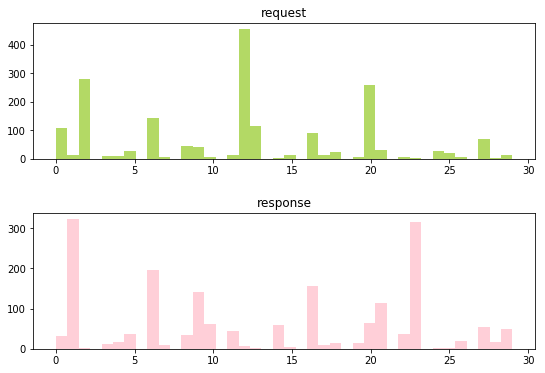

In [31]:
def cluster(feature_name, k):
    sens_vec = []
    black = np.array([0]*w['词'].shape[0])
    for sen in df.response:
        sen = [vec for vec in jieba.cut(sen)]
        sens_vec.append(sum([w[i] if i in w else black for i in sen]))
    clf = KMeans(n_clusters=k) #设定k，这里就是调用KMeans算法
    s = clf.fit(sens_vec) #加载数据集合
#     numSamples = len(sens_vec) 
#     centroids = clf.labels_
    df_cluster = pd.concat((df,pd.DataFrame(clf.labels_,columns = ['cluster'])),axis = 1)
    return clf, df_cluster

clf_reponse, cluster_response = cluster('response', 30)
clf_request, cluster_request = cluster('request', 30)

fig,(ax0,ax1) = plt.subplots(nrows=2,figsize=(9,6)) 
ax0.hist(cluster_request.cluster,40,histtype='bar',facecolor='yellowgreen',alpha=0.75)
ax0.set_title('request')
ax1.hist(cluster_response.cluster,40,histtype='bar',facecolor='pink',alpha=0.75,) 
ax1.set_title("response") 
fig.subplots_adjust(hspace=0.4) 
plt.show()